# San Francisco Police Dept. Crime Prediction (CS 194 Project)
### Anand Kuchibotla, Harish Shanker, Kunal Roy, Alex Romano

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sklearn
import random
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
%matplotlib inline

In [6]:
df = pd.read_csv('data.csv')
df

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150840356,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Thursday,09/24/2015,23:51,RICHMOND,NONE,400 Block of 26TH AV,-122.485806,37.780991,"(37.7809908061782, -122.485806034088)",15084035628150
1,156238559,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,09/24/2015,23:45,SOUTHERN,NONE,HARRISON ST / 11TH ST,-122.412483,37.770631,"(37.7706305910776, -122.41248326348)",15623855906244
2,156238719,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Thursday,09/24/2015,23:30,SOUTHERN,NONE,1400 Block of HARRISON ST,-122.411939,37.771134,"(37.7711341126595, -122.411939261411)",15623871906244
3,150841100,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Thursday,09/24/2015,23:30,NORTHERN,NONE,800 Block of POLK ST,-122.419480,37.784270,"(37.7842697641002, -122.419480276468)",15084110028160
4,150840817,VEHICLE THEFT,STOLEN AUTOMOBILE,Thursday,09/24/2015,23:30,RICHMOND,NONE,700 Block of 18TH AV,-122.476691,37.773831,"(37.7738311003572, -122.476691497828)",15084081707021
5,150840538,FAMILY OFFENSES,MINOR WITHOUT PROPER PARENTAL CARE,Thursday,09/24/2015,23:28,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486,"(37.7564864109309, -122.406539115148)",15084053829110
6,150840312,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,09/24/2015,23:22,INGLESIDE,NONE,MOLIMO DR / MYRA WY,-122.451605,37.737754,"(37.7377539677995, -122.451605350304)",15084031264020
7,156237705,NON-CRIMINAL,LOST PROPERTY,Thursday,09/24/2015,23:10,SOUTHERN,NONE,1000 Block of MARKET ST,-122.411340,37.781271,"(37.7812707434494, -122.411339562557)",15623770571000
8,150840271,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Thursday,09/24/2015,23:01,CENTRAL,"ARREST, BOOKED",BUSH ST / TAYLOR ST,-122.412079,37.789739,"(37.7897391550377, -122.412078903704)",15084027165050
9,150845271,OTHER OFFENSES,LOST/STOLEN LICENSE PLATE,Thursday,09/24/2015,23:00,MISSION,NONE,POTRERO AV / CESAR CHAVEZ ST,-122.405097,37.749110,"(37.7491100050973, -122.405096871916)",15084527171010


##Problem Statement and Background (2 points)

Imagine you are in a crime-ridden city and need to find a way to safely arrive at a specific location. What we aim to do is to provide a service using prior crime data to determine the safest way to get somewhere. Our high level problem is simply: What is the safest route to get from A to B?

###Given Information:
- Day of week
- Time of day
- Start location
- End location
- District

###Data:
- San Francisco Police Department data (above)

###Methodology:
Given a start location and and end location, we first want to determine a set of routes to get from one place to another. For this we use the Mapbox API (more on this later on). Given a set of routes we want to determine a danger rating for each one.

####Danger Rating:
We look through the path and for every x meteres along it, we take that coordinate and find all points within a radius of that point (using a k-d tree) within our data-set, and use Naive Bayes to construct a danger rating of that point at that time. What is important to stress here is the use of both a time and a place when assessing danger. We do this for all points along that path (spaced x meters apart) and determine a total danger of this path.

###Result:
We then compare the danger ratings of all the paths and return to the user the path with the lowest danger rating.

###Other considerations:
The data must be cleaned prior to assessing danger ratings. For example, data on crimes such as "fraud" and "arson" are relatively meaningless either due to sparsity or due to the fact that they aren't physical crimes (fraud occures digitally and cannot be encountered "on the way home")

## The Data Source(s) You Are Using (2 points)

We are using data from the San Francisco government. It is public data on all SF Police Department Incidents. We have around 400 MB of data. We expect to use all of it. It is important to note that new data points are added every day since this a government-monitored data collection that updates in real time.


## Data Joining/Cleaning You Did (4 points)

Our data collection is regularly monitored and published on a government weskit. The only data joining we are doing is to separate and properly format the time of day that an incident is reported and the date that an incident was reported. We don’t want these fields as Strings. Instead, what we are doing is separating these fields into more precise integer fields (month, date, year, minute, second)

We will delete any missing or duplicate keys. The best part about our data set is that it is monitored by the government and is always up to date and does not have anything missing.

The statistical anomalies that we found last time were surprising, but we have determined that they are better described as outliers and thus are not representative of the rest of the data. The only anomalies we encountered were semantic, for instance we excepted more crimes to be on the weekends or Friday, but instead, it was more or less around the same between all of the days.

Some crimes, such as "arson", were too sparse and too few to matter much with what we were trying to do. There were only a few arsons in patterns that weren't cohesive and by nature of the crime, it isn't something associated to trends.

## Analysis Approach (3 points)

The features are float, because we use a Gaussian Naive Bayes classifier. 
We used the sklearn package.
We will use a value transformation when we add time because it is not a float value, so there 
will be a feature mapping. 

Modeling: Gaussian Naive Bayes seemed to fit what we were trying to do the best. In the future, in order to better predict root causes of crime, we plan to throw features into a layered neural network to batch these samples together with some 10 output layers, using this to group crimes with ideas unseen. For example, some crimes might have more in common than others despite what we can see about them superficially. One node might group together and give us common crime patterns of a certain gang, which could help law enforcement prevent further proliferation of such activities. 

Performance measurement: Given the nature of our project and the lack of a collective "right answer", validation set, or label set, there is no real way we can actually assess our performance.

## Preliminary Results

Define suitable performance measures for your problem. Explain why they make sense, and what other measures you considered.
Give the results. These might include accuracy scores, ROC plots and AUC, or precision/recall plots, or results of hypothesis tests.
Describe any tuning that you did.
Explain any hypothesis tests you did. Be explicit about the null and alternative hypothesis. Be very clear about the test you used and how you used it. Include all the experiment details (between/within-subjects, degrees-of-freedom etc). Be frugal with tests. Do not try many tests and report the best results.
Use graphics! Please use visual presentation whenever possible. The next best option is a table. Try to avoid "inlining" important results.

We used a naive bayes classifier using the location to find probabilities of a subset of frequent violent crimes occuring. From this, we had a danger mapping that would sum the probabilities of these points scaled by predetermined danger rating matrix to assess a danger rating for the point. We don't have visualizations of this running yet, but the goal is to visualize these routes running at maximum capacity. We have to figure out a better way to do something that we can create performance measures for. Right now, all these are speculative, there are no test labels or anything we can use to validate our results. Preliminary bayes classifiers are included below. 

Since our data is map based and that is how results are shown. The map displayed all the crimes that occured in San Fracisco. From the graph below, the plot looks just like the layour of San Francisco, was indeed visually pleasing.

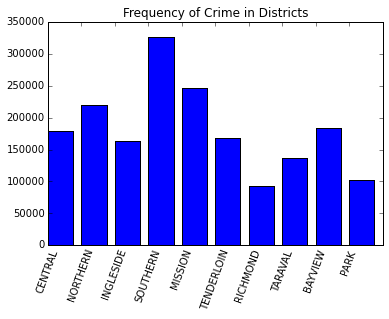

In [7]:
districts = dict(df['PdDistrict'].value_counts())
        
plt.title('Frequency of Crime in Districts')
bins = np.arange(len(districts))
plt.bar(bins, districts.values(), width=0.75)
plt.xticks(bins, list(districts.keys()), rotation=70, ha='center')
plt.show()

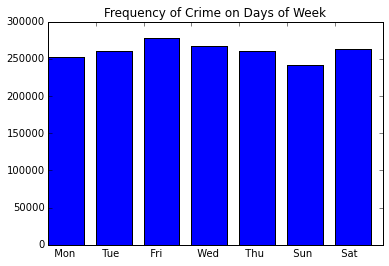

In [4]:
dow = dict(df['DayOfWeek'].value_counts())
        
plt.title('Frequency of Crime on Days of Week')
bins = np.arange(len(dow))
plt.bar(bins, dow.values(), width=0.75)
plt.xticks(bins, ['  ' + d[:3] for d in dow.keys()], ha='left')
plt.show()

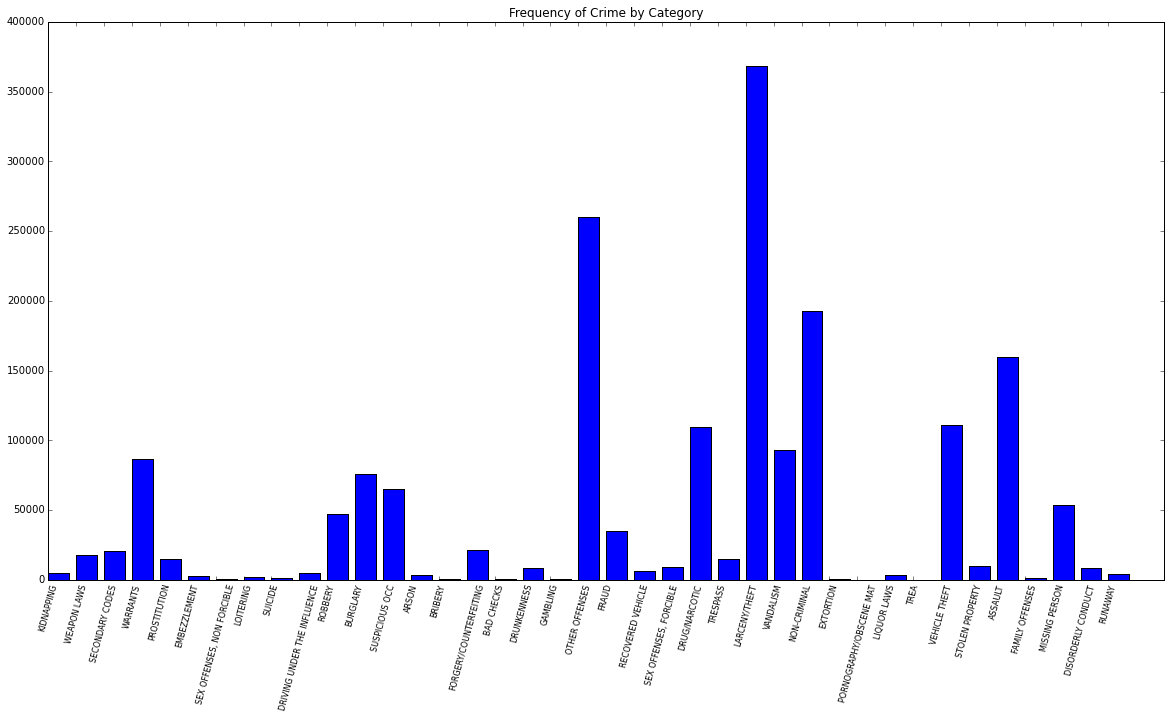

In [11]:
cats = dict(df['Category'].value_counts())

plt.figure(figsize=(20, 10))
plt.title('Frequency of Crime by Category')
bins = np.arange(len(cats))
plt.bar(bins, cats.values(), width=0.75)
plt.xticks(bins, list(cats.keys()), rotation=75, size=8, ha='center')
plt.show()

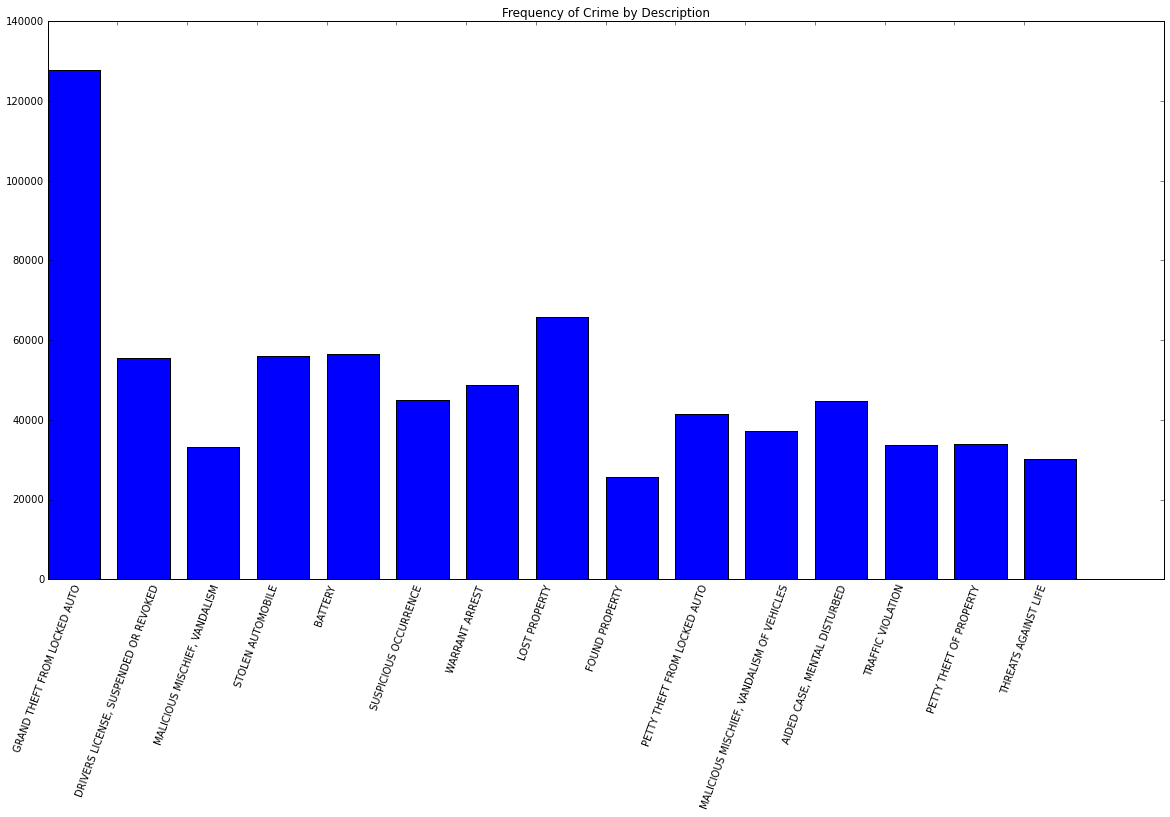

In [6]:
descs = dict(df['Descript'].value_counts()[:15])

plt.figure(figsize=(20,10))
plt.title('Frequency of Crime by Description')
bins = np.arange(len(descs))
plt.bar(bins, descs.values(), width=0.75)
plt.xticks(bins, list(descs.keys()), rotation=70, ha='center')
plt.show()

In [7]:
times_lists = {'6AM-10AM': [], '10AM-2PM': [], '2PM-6PM': [], '6PM-10PM': [], '10PM-2AM': [], '2AM-6AM': []}
location_lists = {'6AM-10AM': [], '10AM-2PM': [], '2PM-6PM': [], '6PM-10PM': [], '10PM-2AM': [], '2AM-6AM': []}
dow = {}
cats_lists = {}

for c in set(df['Category']):
    cats_lists[c] = {'6AM-10AM': 0, '10AM-2PM': 0, '2PM-6PM': 0, '6PM-10PM': 0, '10PM-2AM': 0, '2AM-6AM': 0}

for i in range(len(df)):
    
    hour = int(df['Time'][i].split(':')[0])
    cat = df['Category'][i]
    location = (float(df['Y'][i]), float(df['X'][i]))
    
    if hour in range(6, 10):
        times_lists['6AM-10AM'].append(cat)
        cats_lists[cat]['6AM-10AM'] += 1 
        location_lists['6AM-10AM'].append(location)
    elif hour in range(10, 14):
        times_lists['10AM-2PM'].append(cat)
        cats_lists[cat]['10AM-2PM'] += 1 
        location_lists['10AM-2PM'].append(location)
    elif hour in range(14, 18):
        times_lists['2PM-6PM'].append(cat)
        cats_lists[cat]['2PM-6PM'] += 1 
        location_lists['2PM-6PM'].append(location)
    elif hour in range(18, 22):
        times_lists['6PM-10PM'].append(cat)
        cats_lists[cat]['6PM-10PM'] += 1 
        location_lists['6PM-10PM'].append(location)
    elif hour in range(22, 25) or hour in range(0, 2):
        times_lists['10PM-2AM'].append(cat)
        cats_lists[cat]['10PM-2AM'] += 1 
        location_lists['10PM-2AM'].append(location)
    elif hour in range(2, 6):
        times_lists['2AM-6AM'].append(cat)
        cats_lists[cat]['2AM-6AM'] += 1 
        location_lists['2AM-6AM'].append(location)

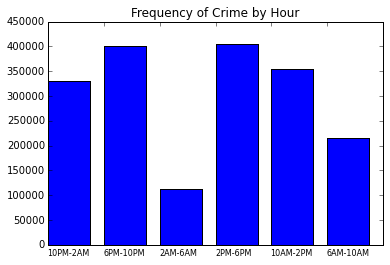

In [8]:
times = {}
for key in times_lists:
    times[key] = len(times_lists[key])

plt.title('Frequency of Crime by Hour')
bins = np.arange(len(times))
plt.bar(bins, times.values(), width=0.75)
plt.xticks(bins, list(times.keys()), size=8, ha='left')
plt.show()

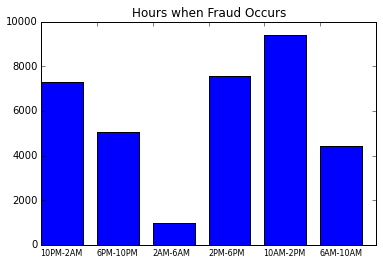

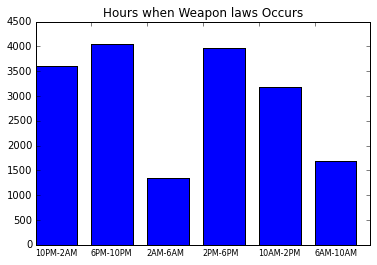

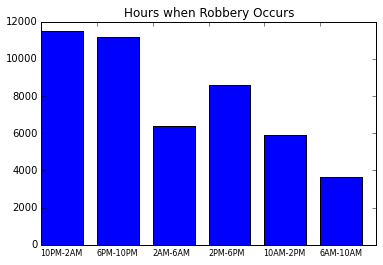

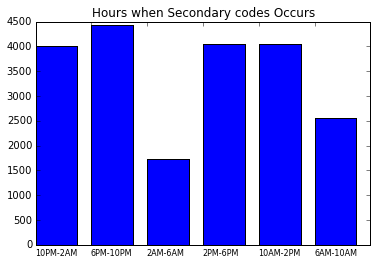

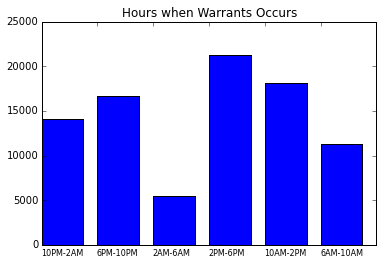

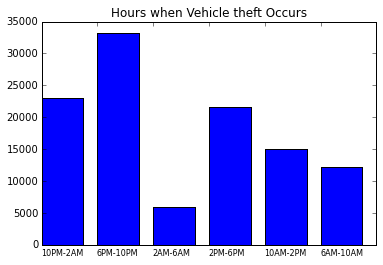

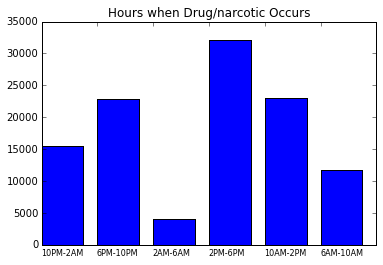

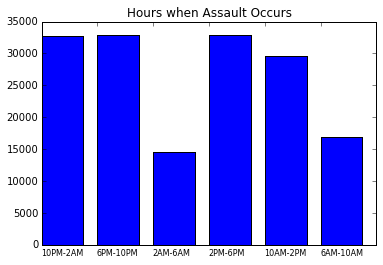

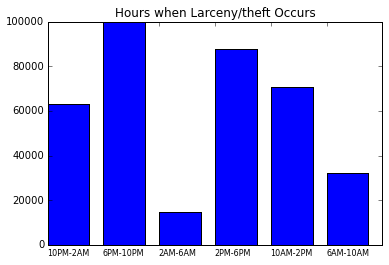

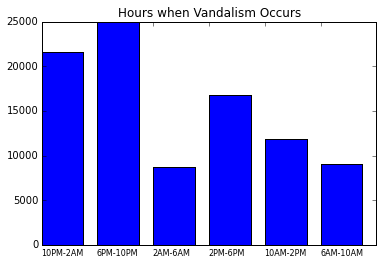

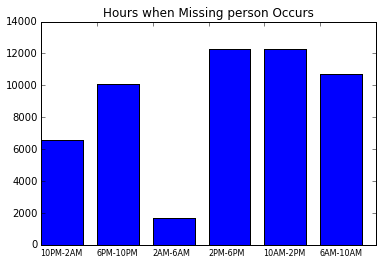

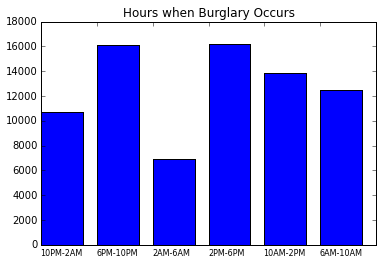

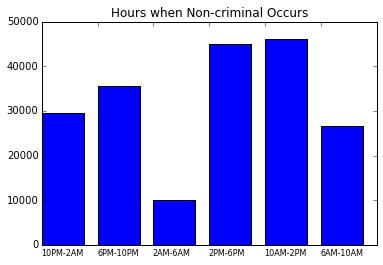

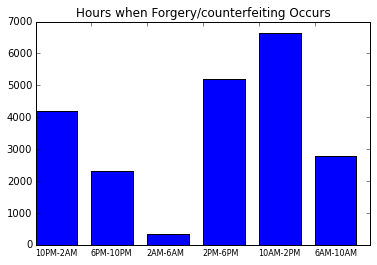

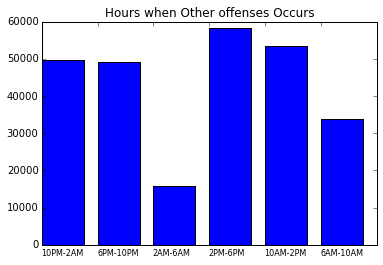

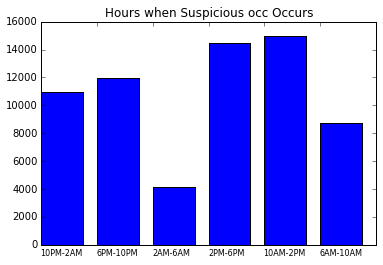

In [9]:
crimes = list(dict(df['Category'].value_counts()[:16]).keys())
for crime in crimes:
    c = cats_lists[crime]
    plt.title('Hours when ' + crime[0] + crime[1:].lower() + ' Occurs')
    bins = np.arange(len(c))
    plt.bar(bins, c.values(), width=0.75)
    plt.xticks(bins, list(c.keys()), size=8, ha='left')
    plt.show()

In [9]:
colors = ['red', 'green', 'blue', 'gray', 'purple', 'orange']
c = 0

plt.figure(figsize=(50,50))

for key in location_lists:
    for i in location_lists[key][:10000]:
        plt.scatter(i[0], i[1], color=colors[c])
    c += 1

KeyboardInterrupt: 

KeyboardInterrupt: 

### Here we use the mapbox API to get directions from one coordinate to another

In [ ]:
import requests
import json

start_coords = [-122.416782, 37.776938]
end_coords = [-122.390195, 37.790152]
r = requests.get('https://api.mapbox.com/v4/directions/mapbox.walking/' + ','.join(map(str, start_coords)) + ';' + ','.join(map(str, end_coords)) + '.json?access_token=pk.eyJ1IjoiYWt1Y2hpYm90bGEiLCJhIjoiY2lnMGliOW40MDd4eXV2bTQwY2dtcHNlYiJ9.irCaIKlxjQkTDQyL8dSSzg')
j = json.loads(r.text)

j['routes']

In [31]:
# End goal: Proposes route using least dangerous generated route from direction api

# This cell trains general naive bayes classifiers (1 for each single crime)

# 11 most frequent 'violent' crimes found
violentCrimeFactor={'GRAND THEFT FROM LOCKED AUTO':2, 'MALICIOUS MISCHIEF:':0.5, 'VANDALISM':0.7, 'STOLEN AUTOMOBILE':3, 'BATTERY':3.5, 'SUSPICIOUS OCCURRENCE':0.8, 'WARRANT ARREST':1.5, 'PETTY THEFT FROM LOCKED AUTO':1.3, 'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES':1.4, 'AIDED CASE, MENTAL DISTURBED':1.5, 'PETTY THEFT OF PROPERTY':1.2, 'THREATS AGAINST LIFE':2.4}

# for crime in violentCrimes:
#     CrimeToSeq[crime]=count
#     count+=1
# for crime in CrimeToSeq.keys():
#     SeqToCrime[CrimeToSeq[crime]]=crime


##################################
# Gaussian NB classifier         #
# Fitting(time,location)--> crime#
# P(crime)|features set          #
##################################

gnb=GaussianNB()
logreg=LogisticRegression()

LabelY=df['Category'] #.tolist() # Prediction categories

# DataX=df[['X','Y']]  # Add time later 
DataX=df['PdDistrict']


# Police district keys
districtNames = districts.keys()
categoryNames = cats.keys()
districtNums = []
categoryNums = []
times=[]

def convertTimeToClass(time):
    hour = int(time.split(":")[0])
    if hour >= 22:
        return 4
    elif hour >= 18:
        return 3
    elif hour >= 14:
        return 2
    elif hour >= 10:
        return 1
    elif hour >= 6:
        return 0
    elif hour >= 2:
        return 5
    return 4


for d in df['PdDistrict']:
    districtNums.append(districtNames.index(d))
    
for c in df['Category']:
    categoryNums.append(categoryNames.index(c))

for time in df['Time']:
    times.append(convertTimeToClass(time))
    
    
np_districtNums=np.array(districtNums).reshape(len(districtNums),1)
np_categoryNums=np.array(categoryNums)
np_times=np.array(times).reshape(len(times),1)

logreg.fit(np_times,np_categoryNums)

print logreg.score(np_times,np_categoryNums)
    
# rows=random.sample(df.index,len(df.index)*9/10)

# TrainX=DataX.ix[rows]
# ValidateX=DataX.drop(rows)

# TrainY=LabelY.ix[rows]
# ValidateY=LabelY.drop(rows)

TrainX=[tuple(x) for x in DataX.values]
# ValidateX=[tuple(x) for x in ValidateX.values]

TrainY=[tuple(x) for x in LabelY.values]
# ValidateY=[tuple(x) for x in ValidateY.values]

gnb.fit(TrainX,TrainY) # Fit on train set 

# probs=gnb.predict_proba(ValidateX)

# all she needed was some

print gnb.score(TrainX,TrainY)
    
def danger_rating(x,y):
    class_pred=gnb.predict_proba(np.array((x,y)))
    label_index = np.argmax(class_pred)
    label = LabelY[label_index]
    if label in violentCrimeFactor:
        return violentCrimeFactor[label]
    else:
        print(label)



0.202289573237


ValueError: need more than 1 value to unpack

In [ ]:
print (probs.shape)

In [16]:
df.loc[df['X'] == -122.400922761049]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
21773,156189946,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,08/02/2015,20:25,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15618994606372
21774,156189946,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Sunday,08/02/2015,20:25,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15618994606374
35190,156158797,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Wednesday,07/01/2015,19:30,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15615879706372
45869,150498325,"SEX OFFENSES, FORCIBLE",ASSAULT TO RAPE WITH BODILY FORCE,Sunday,06/07/2015,02:00,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15049832502104
51618,150457832,MISSING PERSON,FOUND PERSON,Sunday,05/24/2015,22:00,CENTRAL,LOCATED,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15045783275000
51623,150457832,MISSING PERSON,MISSING ADULT,Sunday,05/24/2015,22:00,CENTRAL,LOCATED,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15045783274000
53806,156121512,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Wednesday,05/20/2015,01:30,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15612151206374
67000,150340986,ASSAULT,BATTERY,Sunday,04/19/2015,05:00,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15034098604134
70463,150315939,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Saturday,04/11/2015,09:00,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15031593909029
84041,156060716,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Wednesday,03/11/2015,07:00,CENTRAL,NONE,400 Block of CLAY ST,-122.400923,37.79496,"(37.794959803128, -122.400922761049)",15606071606374


In [ ]:
danger_rating(-122.423001696251, 37.7649050761616)

In [26]:
#Cluster data by time of day and day of week (so it can later be mapped by loctation onto SF)

#map times of data to ints
def convertTimeToClass(time):
    hour = int(time.split(":")[0])
    if hour >= 22:
        return 4
    elif hour >= 18:
        return 3
    elif hour >= 14:
        return 2
    elif hour >= 10:
        return 1
    elif hour >= 6:
        return 0
    elif hour >= 2:
        return 5
    return 4


def convertDayToClass(day):
    if day == 'Sunday':
        return 0
    elif day == 'Monday':
        return 1
    elif day == 'Tuesday':
        return 2
    elif day == 'Wednesday':
        return 3
    elif day == 'Thursday':
        return 4
    elif day == 'Friday':
        return 5
    return 6

times = []
days = []

for time in df['Time']:
    times.append(convertTimeToClass(time))
    
for day in df['DayOfWeek']:
    days.append(convertDayToClass(day))

d = np.column_stack((np.array(times),np.array(days)))


In [46]:
km = KMeans(n_clusters=5)
result = km.fit_predict(d)

In [47]:
df["Location"][9]

'(37.7839789136387, -122.420212775999)'

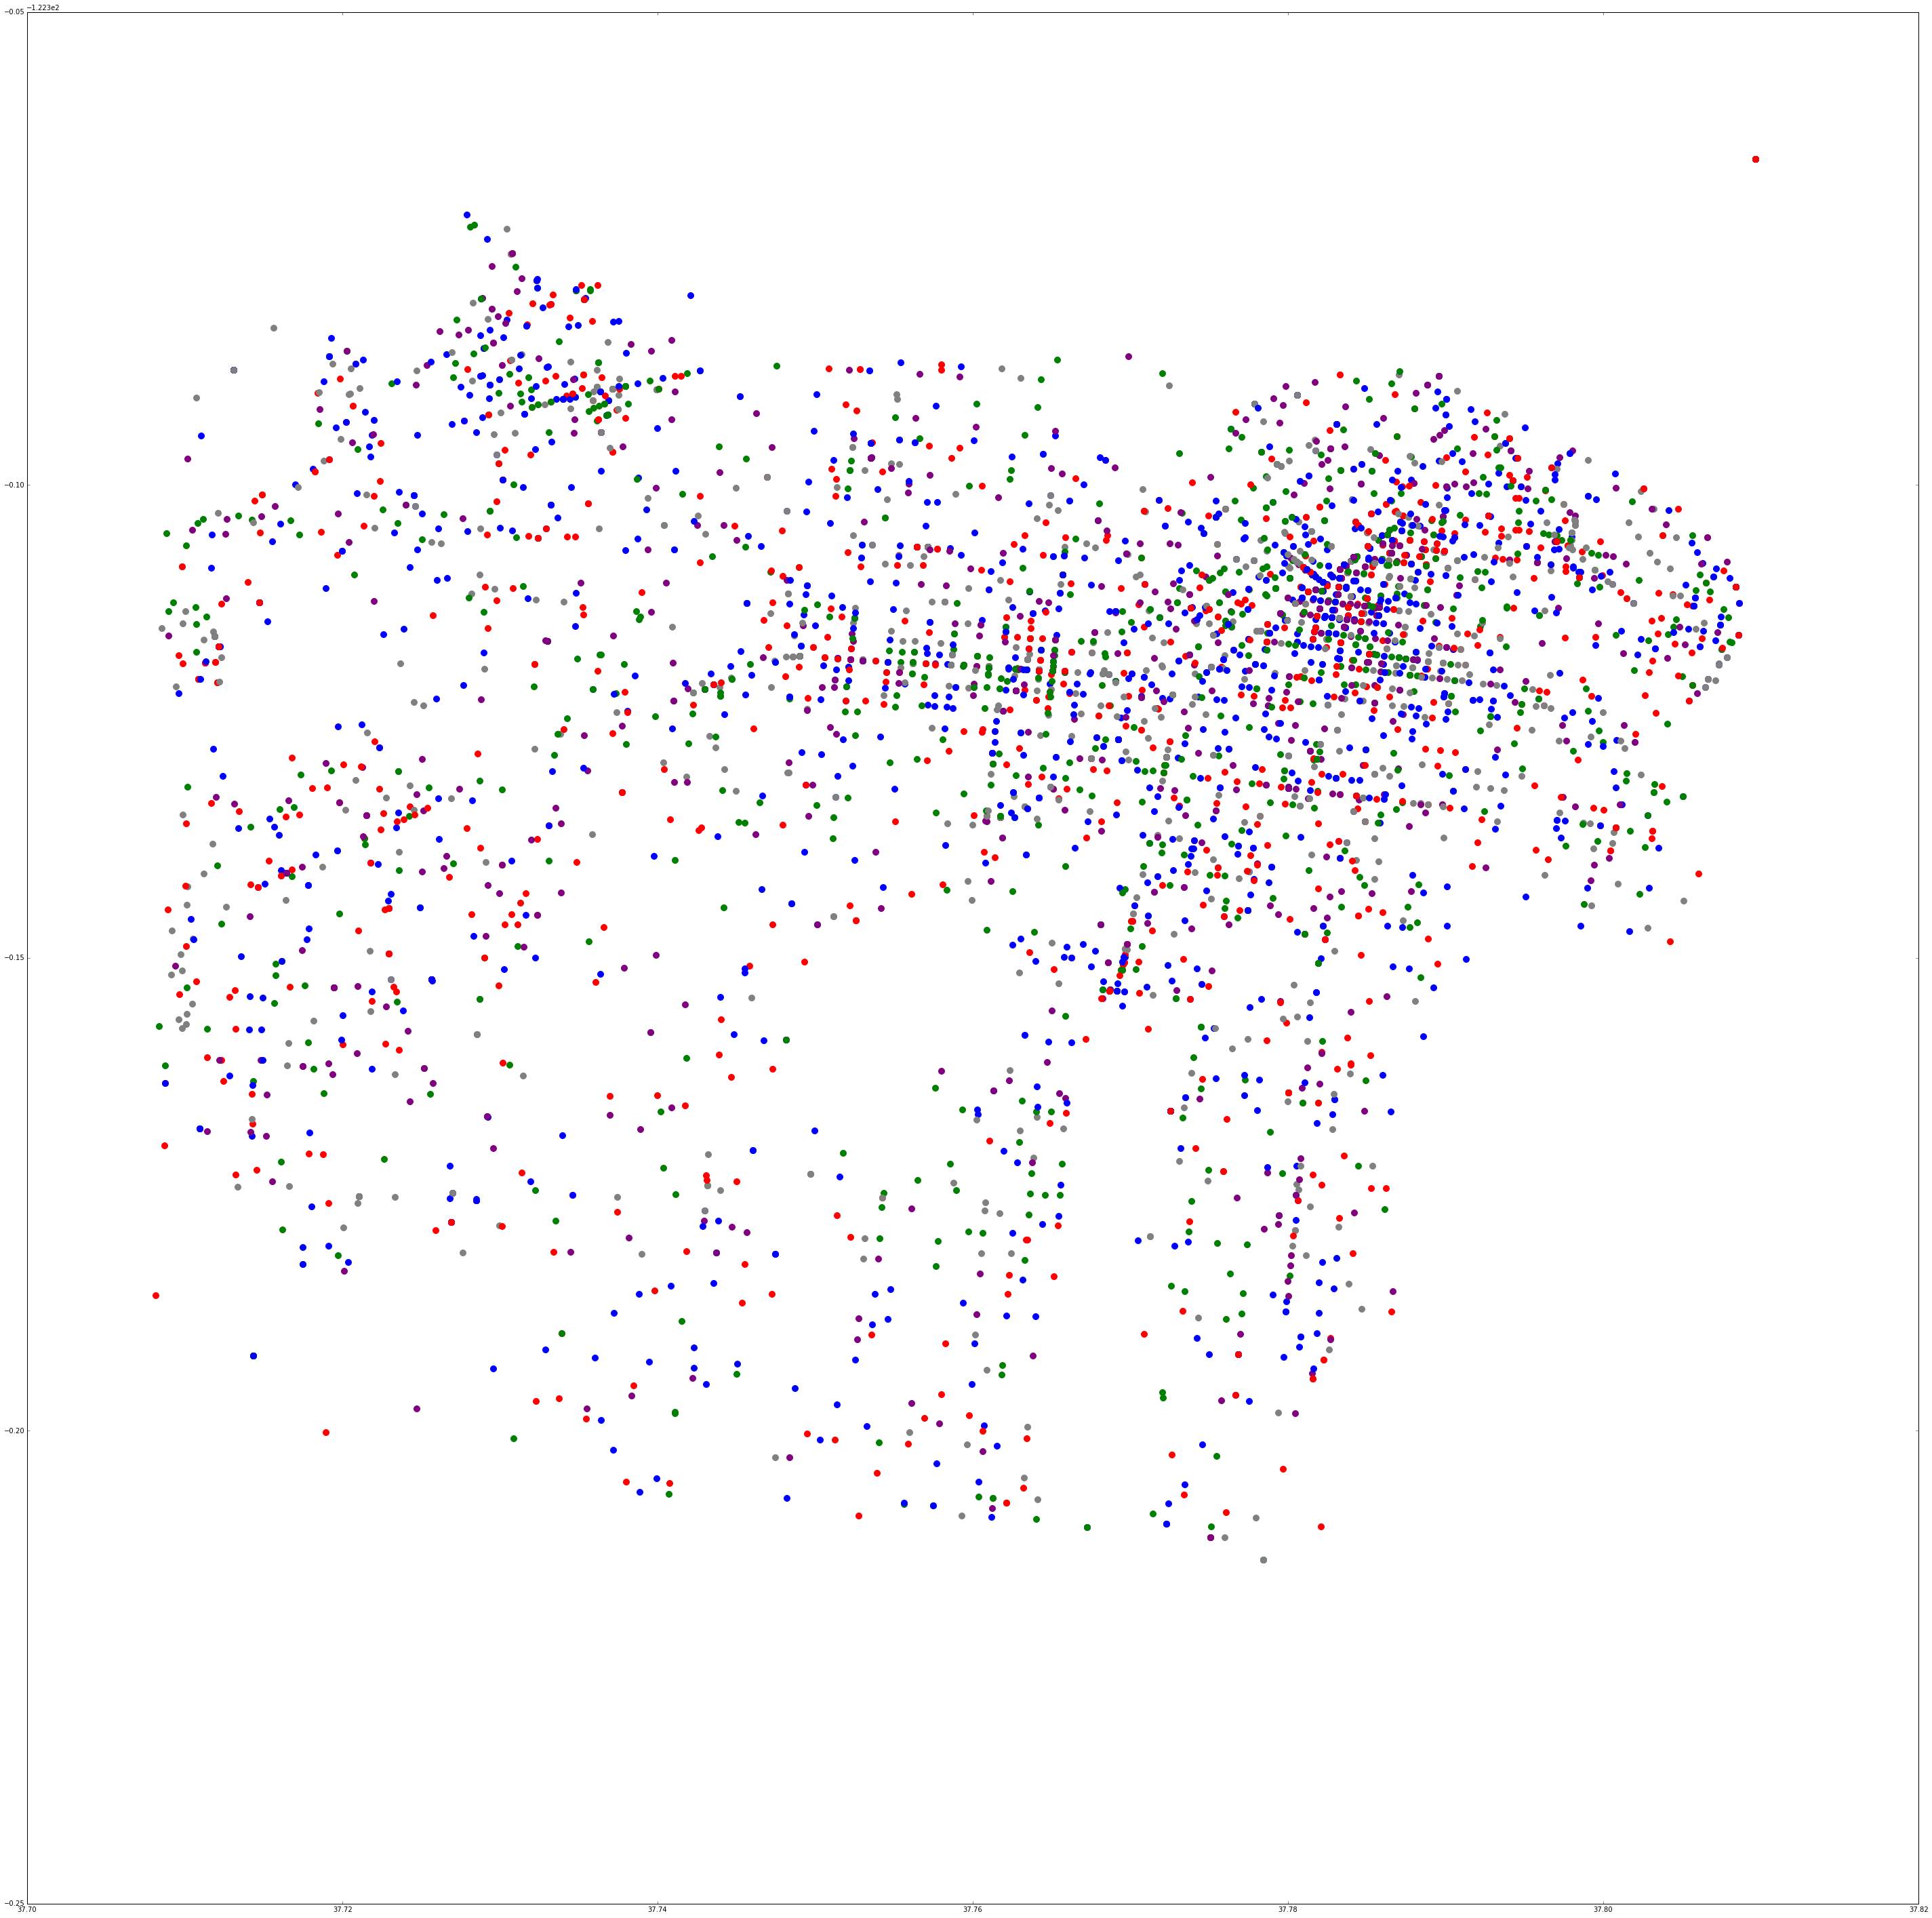

In [54]:
import random
#map clustered data onto locations (in SF)
colors = ['red', 'green', 'blue', 'gray', 'purple']

plt.figure(figsize=(50,50))

locations = df["Location"]
for i in range(5000):
    num = random.randint(0,len(locations))
    x = float(locations[num].split(",")[0][1:])
    if x < 45:
        y = float(locations[num].split(", ")[1].split(")")[0])
        plt.scatter(x,y,color=colors[result[num]],s=80)
    